# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
!pip show vanna   # 0.5.5, 0.2.1

Name: vanna
Version: 0.5.5
Summary: Generate SQL queries from natural language
Home-page: 
Author: 
Author-email: Zain Hoda <zain@vanna.ai>
License: 
Location: /home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages
Requires: flask, flask-sock, kaleido, pandas, plotly, requests, sqlalchemy, sqlparse, tabulate
Required-by: 


In [2]:
!pip show ollama   # 0.2.0

Name: ollama
Version: 0.2.0
Summary: The official Python client for Ollama.
Home-page: https://ollama.ai
Author: Ollama
Author-email: hello@ollama.com
License: MIT
Location: /home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages
Requires: httpx
Required-by: 


In [3]:
from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

config = {
    'model': 'duckdb-nsql', # 'llama3'  # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> SQLite</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../other-database-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [5]:
import os.path
# file_db = "./db/gpt3sql.sqlite"

file_db = "~/Downloads/chinook.duckdb"
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_duckdb(file_db)

True


In [6]:
vn.run_sql_is_set

True

In [7]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [8]:
if False: # True: # 
    remove_collections()

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [9]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,f80850a9-c302-503b-a436-37abbfe15d4b-sql,SELECT * FROM t_person WHERE name = 'John Doe';,SELECT * FROM t_person WHERE name = 'John Doe',sql
0,044ba63a-a15d-5339-b4f1-950e93c541be-ddl,None,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...,ddl
1,291a67cf-a386-5e8a-b858-dee5a9060a31-ddl,None,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...,ddl
2,3337d9c1-6447-541d-b8d3-9a90f3f85fc8-ddl,None,CREATE INDEX [IFK_AlbumArtistId] ON [Album] ([...,ddl
3,344578ab-d80f-52d4-976e-78a3e54d3c6d-ddl,None,CREATE TABLE [Employee]\n(\n [EmployeeId] I...,ddl
4,3858dfec-459a-53b5-afc9-8d854748161f-ddl,None,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...,ddl
5,52c8d5a3-d118-50af-bb23-2cd719fc02d2-ddl,None,CREATE INDEX [IFK_TrackMediaTypeId] ON [Track]...,ddl
6,5665d55f-7b6d-5d98-8e43-6653428695fa-ddl,None,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...,ddl
7,5793b49d-25f0-56ac-8557-45389b6ad864-ddl,None,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...,ddl
8,58b2d5f7-d7a5-5c6c-8708-7eb383fabb4c-ddl,None,CREATE INDEX [IFK_PlaylistTrackTrackId] ON [Pl...,ddl


### skip if training data is already loaded

In [13]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [14]:
df_ddl

,type,sql
0,table,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [15]:
for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
)
Adding ddl: CREATE TABLE [Customer]
(
    [CustomerId] INTEGER  NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    CONSTRAINT [PK_Customer] PRIMARY KEY  ([CustomerId]),
    FOREIGN KEY ([SupportRepId]) REFERENCES [Employee] ([Emp

In [16]:
new_table_name = "t_person"

In [17]:
# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships

vn.train(ddl=f"""
    CREATE TABLE IF NOT EXISTS {new_table_name} (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        email text,
        age INT
    )
""")

Adding ddl: 
    CREATE TABLE IF NOT EXISTS t_person (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        email text,
        age INT
    )



'a4e8be30-d5dd-5a8a-aa99-64c74783e17d-ddl'

In [18]:
# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

Adding documentation....


'51cf1d6d-7637-5b87-b9e7-31c577fbde59-doc'

In [18]:
# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Data for Business term for customer")

Adding documentation....


'51cf1d6d-7637-5b87-b9e7-31c577fbde59-doc'

In [19]:
# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql=f"SELECT * FROM {new_table_name} WHERE name = 'John Doe'")

Ollama parameters:
model=duckdb-nsql:latest,
options={},
keep_alive=None
Prompt Content:
[{"role": "system", "content": "The user will give you SQL and you will try to guess what the business question this query is answering. Return just the question without any additional explanation. Do not reference the table name in the question."}, {"role": "user", "content": "SELECT * FROM t_person WHERE name = 'John Doe'"}]
Ollama Response:
{'model': 'duckdb-nsql:latest', 'created_at': '2024-06-08T15:59:15.983753813Z', 'message': {'role': 'assistant', 'content': " SELECT * FROM t_person WHERE name = 'John Doe';"}, 'done_reason': 'stop', 'done': True, 'total_duration': 11429242156, 'load_duration': 2840824594, 'prompt_eval_count': 115, 'prompt_eval_duration': 6417323000, 'eval_count': 15, 'eval_duration': 2040552000}
Question generated with sql:  SELECT * FROM t_person WHERE name = 'John Doe'; 
Adding SQL...


'f80850a9-c302-503b-a436-37abbfe15d4b-sql'

In [20]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,f80850a9-c302-503b-a436-37abbfe15d4b-sql,SELECT * FROM t_person WHERE name = 'John Doe';,SELECT * FROM t_person WHERE name = 'John Doe',sql
0,044ba63a-a15d-5339-b4f1-950e93c541be-ddl,None,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...,ddl
1,291a67cf-a386-5e8a-b858-dee5a9060a31-ddl,None,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...,ddl
2,3337d9c1-6447-541d-b8d3-9a90f3f85fc8-ddl,None,CREATE INDEX [IFK_AlbumArtistId] ON [Album] ([...,ddl
3,344578ab-d80f-52d4-976e-78a3e54d3c6d-ddl,None,CREATE TABLE [Employee]\n(\n [EmployeeId] I...,ddl
4,3858dfec-459a-53b5-afc9-8d854748161f-ddl,None,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...,ddl
5,52c8d5a3-d118-50af-bb23-2cd719fc02d2-ddl,None,CREATE INDEX [IFK_TrackMediaTypeId] ON [Track]...,ddl
6,5665d55f-7b6d-5d98-8e43-6653428695fa-ddl,None,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...,ddl
7,5793b49d-25f0-56ac-8557-45389b6ad864-ddl,None,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...,ddl
8,58b2d5f7-d7a5-5c6c-8708-7eb383fabb4c-ddl,None,CREATE INDEX [IFK_PlaylistTrackTrackId] ON [Pl...,ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a DuckDB SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Playlist]\n(\n    [PlaylistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Playlist] PRIMARY KEY  ([PlaylistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [MediaType]\n(\n    [MediaTypeId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_MediaType] PRIMARY KEY  ([MediaTypeId])\n)\n\nCREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL

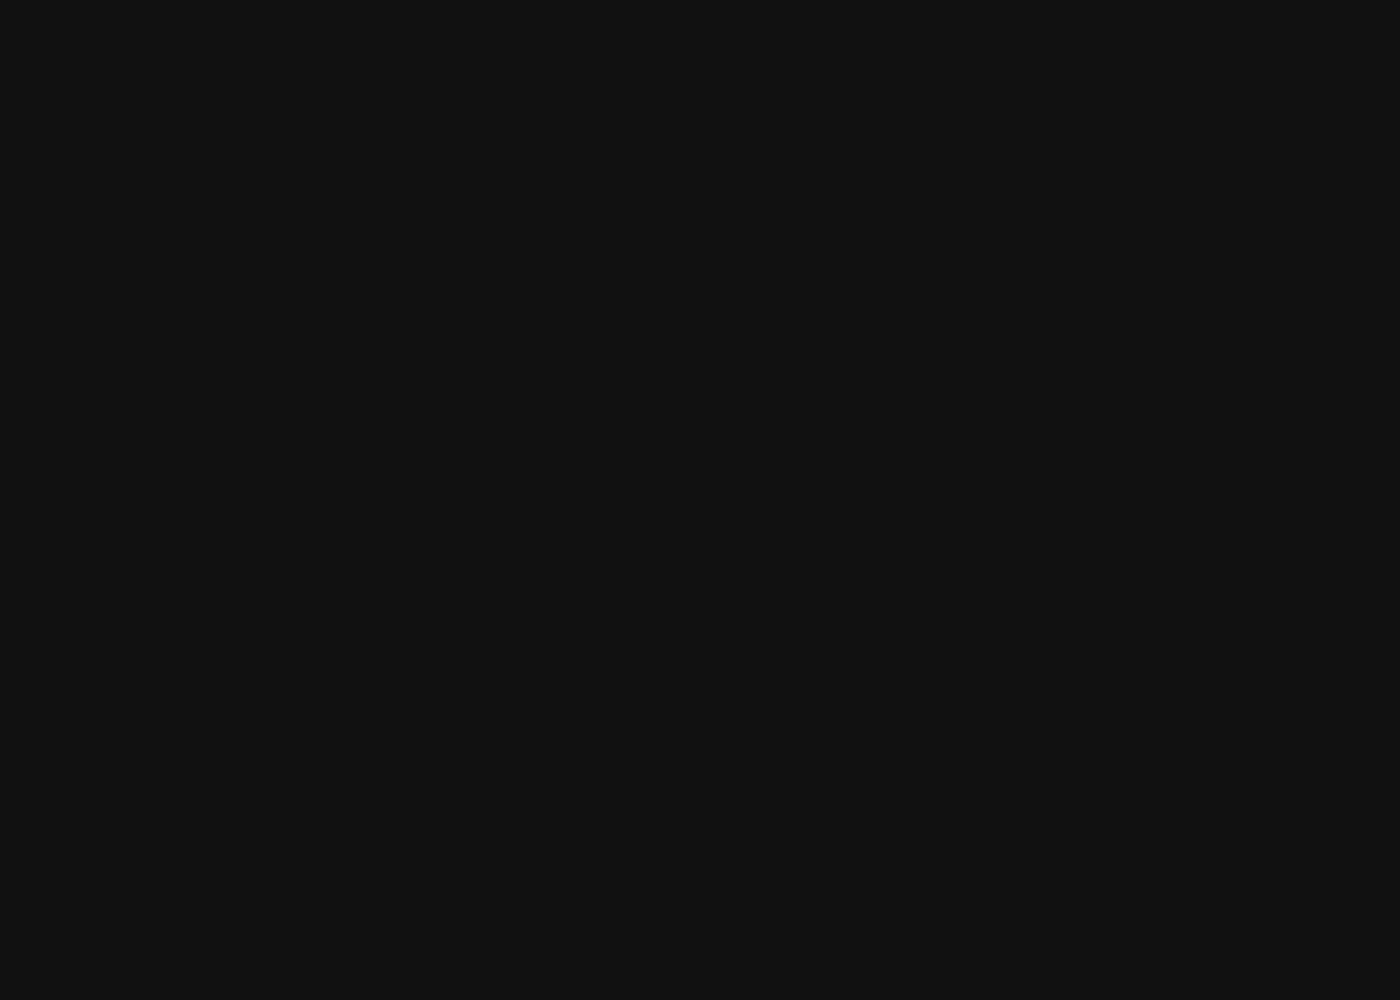

(' SHOW TABLES;',
 Empty DataFrame
 Columns: [name]
 Index: [],
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'name=%{label}<extra></extra>',
               'labels': array([], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
 }))

In [10]:
vn.ask(question="Show me a list of tables in the database")

In [11]:
vn.ask(question="How many records are in table called customer")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a DuckDB SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL,\n    [BillingAddress] NVARCHAR(70),\n    [BillingCity] NVARCHAR(40),\n    [BillingState] NVARCHAR(40),\n    [BillingCountry] NVARCHAR(40),\n    [BillingPostalCode] NVARCHAR(10),\n    [Total] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),\n    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Customer]\n(\n    [CustomerId] INTEGER  NOT NULL,\n    [FirstName] NVARCHAR(40)  NOT NULL,\n    [LastName] NVARCHAR(20)  NOT NULL,\n    [Company] NVARCHAR(80),\n    [Address] NVARCHAR(70),\n    [City] NV

In [12]:
vn.ask(question="How many customers are there")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a DuckDB SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX [IFK_CustomerSupportRepId] ON [Customer] ([SupportRepId])\n\nCREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL,\n    [BillingAddress] NVARCHAR(70),\n    [BillingCity] NVARCHAR(40),\n    [BillingState] NVARCHAR(40),\n    [BillingCountry] NVARCHAR(40),\n    [BillingPostalCode] NVARCHAR(10),\n    [Total] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),\n    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Customer]\n(\n    [CustomerId] INTEGER  NOT NULL,\n    [FirstName] NVARCHAR(40)  NOT NULL,\n    [LastName] NVARCHAR(20)  NOT NULL

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL,\n    [BillingAddress] NVARCHAR(70),\n    [BillingCity] NVARCHAR(40),\n    [BillingState] NVARCHAR(40),\n    [BillingCountry] NVARCHAR(40),\n    [BillingPostalCode] NVARCHAR(10),\n    [Total] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),\n    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Customer]\n(\n    [CustomerId] INTEGER  NOT NULL,\n    [FirstName] NVARCHAR(40)  NOT NULL,\n    [LastName] NVARCHAR(20)  NOT NULL,\n    [Company] NVARCHAR(80),\n    [Address] NVARCHAR(70),\n    [City] NVARCH

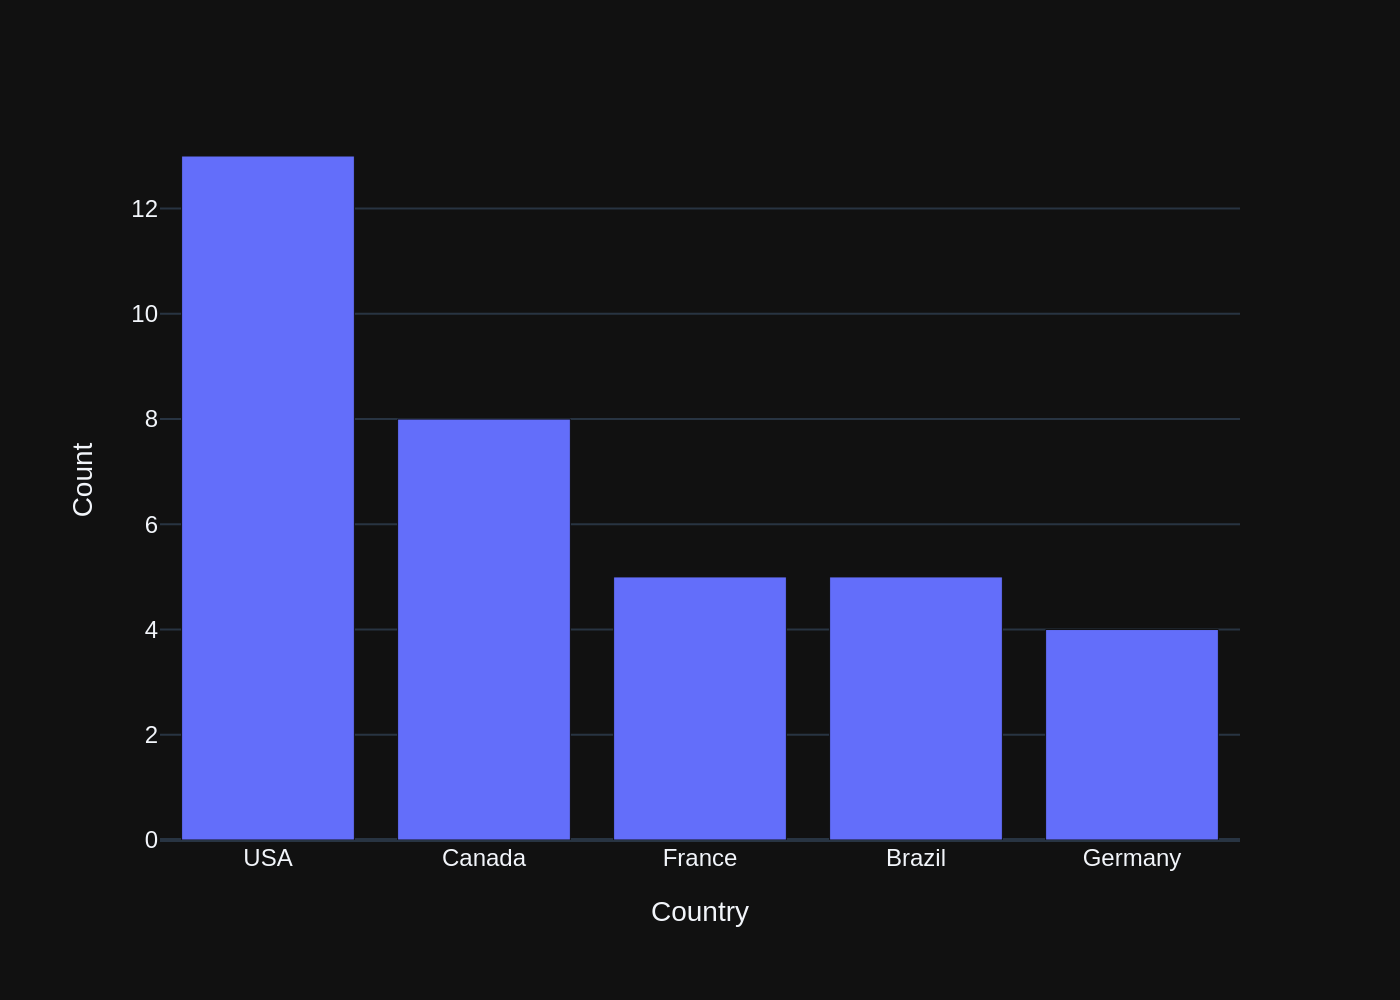

('SELECT Country, COUNT(*) AS Count \nFROM Customer \nGROUP BY Country \nORDER BY Count DESC \nLIMIT 5',
    Country  Count
 0      USA     13
 1   Canada      8
 2   France      5
 3   Brazil      5
 4  Germany      4,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Country=%{x}<br>Count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['USA', 'Canada', 'France', 'Brazil', 'Germany'], dtype=object),
               'xaxis': 'x',
               'y': array([13,  8,  5,  5,  4]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'tem

In [25]:
vn.ask(question="what are the top 5 countries that customers come from?")

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [26]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port

SystemExit: 1

/home/papagame/anaconda3/envs/vanna/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
